# Минипроект №6.
В нём вы поработаете с API и узнаете, как ведут себя пользователи на сайте Яндекс.Метрики.

Так как мы работаем с демо данными Яндекс.Метрики, нам позволено видеть данные только за последнюю неделю. Это требует обновления заданий и ответов на них каждую неделю, что не очень удобно и вам, и нам. Поэтому для удобства проверки мы решили немного модифицировать степы: теперь для того, чтобы ответить на вопросы, вам необходимо поработать с уже выгруженными датасетами из Яндекс.Метрики. Но вы можете самостоятельно повторить каждый из запросов в задании к реальному API Яндекс.Метрики, чтобы потренироваться и получить данные в таком же формате, как в прикрепленном к задаче датасете.

### Задача №1.
Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Выберите правильные утверждения:
- Наименьшее число посещений пользователей-людей наблюдается 15 июня
- Наибольшая разница между числом посещений людьми и ботами наблюдается 16 июня
- 15 июня сайт посетило наибольшее число ботов
- 15 июня ботов было примерно в два раза больше, чем 16 июня
- 15 июня сайт посетило наименьшее число ботов
- Наименьшее число посещений наблюдается 17 июня только среди пользователей
- 17 июня сайт посетило наибольшее число ботов, по сравнению с 15 и 16 июня
- 17 июня ботов было примерно в два раза меньше, чем 15 июня

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import requests

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
#Давайте посмотрим на распределение посещений сайта по дням. 
#Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.
Jandex_Metrics_data = pd.read_csv('C:/Users/79196/Projects/data/step_1_lesson_7.csv')
Jandex_Metrics_data

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [4]:
people_by_date = Jandex_Metrics_data.query('user_type == "People"') \
                                    .pivot(index = 'date', columns='user_type', values='visits') \
                                    .rename(columns={'People':'people'})
people_by_date

user_type,people
date,
2020-06-15,417.0
2020-06-16,472.0
2020-06-17,475.0


In [5]:
robots_by_date = Jandex_Metrics_data.query('user_type == "Robots"') \
                                    .pivot(index = 'date', columns='user_type', values='visits') \
                                    .rename(columns={'Robots':'robots'})
robots_by_date

user_type,robots
date,
2020-06-15,177.0
2020-06-16,91.0
2020-06-17,138.0


C:\Users\79196\AppData\Local\Temp\ipykernel_10780\3253497346.py:2: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax2 = sns.lineplot(people_by_date, palette = ['Red', 'Blue'])


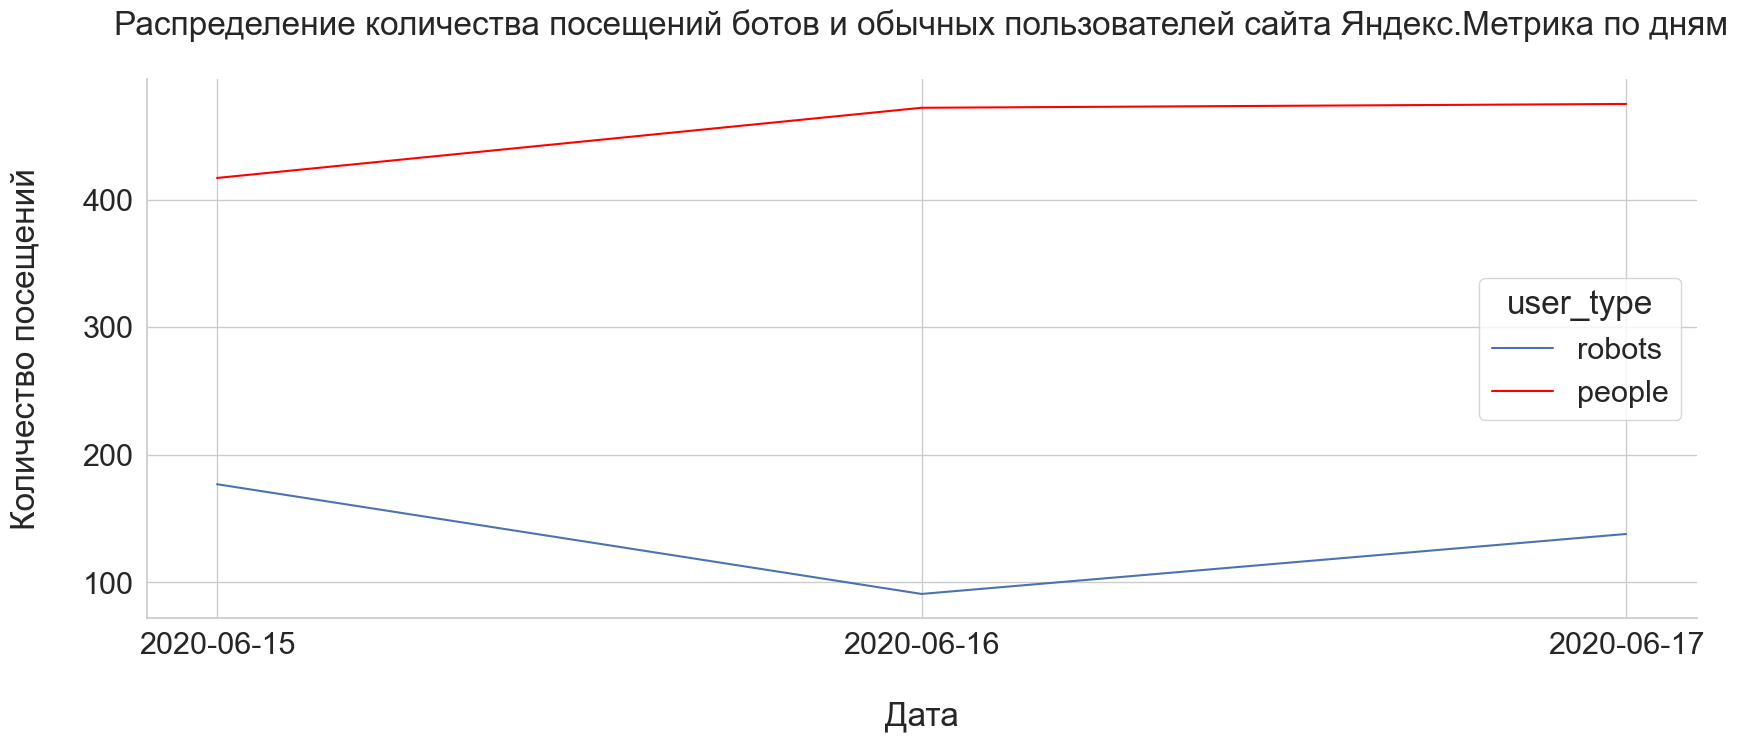

In [6]:
ax1 = sns.lineplot(robots_by_date)
ax2 = sns.lineplot(people_by_date, palette = ['Red', 'Blue'])
ax2.set_title('Распределение количества посещений ботов и обычных пользователей сайта Яндекс.Метрика по дням\n')
ax2.set_ylabel('Количество посещений\n')
ax2.set_xlabel('\nДата')
sns.despine()

In [7]:
pivot_table_bydate = people_by_date.merge(robots_by_date, how='inner', on='date')
pivot_table_bydate

user_type,people,robots
date,,
2020-06-15,417.0,177.0
2020-06-16,472.0,91.0
2020-06-17,475.0,138.0


In [8]:
pivot_table_bydate['delta'] = pivot_table_bydate.people - pivot_table_bydate.robots #--разница между людьми и ботами по дням
pivot_table_bydate

user_type,people,robots,delta
date,,,
2020-06-15,417.0,177.0,240.0
2020-06-16,472.0,91.0,381.0
2020-06-17,475.0,138.0,337.0


**Ответ:** 
- Наименьшее число посещений пользователей-людей наблюдается 15 июня
- Наибольшая разница между числом посещений людьми и ботами наблюдается 16 июня
- 15 июня сайт посетило наибольшее число ботов
- 15 июня ботов было примерно в два раза больше, чем 16 июня

### Задача №2.
Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Ответ округлите до целого.

In [9]:
Jandex_Metrics_data_2 = pd.read_csv('C:/Users/79196/Projects/data/step_2_lesson_7.csv')
Jandex_Metrics_data_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [10]:
visits_Google_Chrome = Jandex_Metrics_data_2.query('browser == "Google Chrome"').visits.sum()
visits_sum = Jandex_Metrics_data_2.visits.sum()

In [11]:
percent_visits_Google_Chrome = round((visits_Google_Chrome / visits_sum) * 100)
percent_visits_Google_Chrome

60

**Ответ:** процент посещений сайта Яндекс.Метрики с сайта Google Chrom = 60 %

### Задача №3.
Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?
В качестве ответа укажите название браузера.

In [12]:
Jandex_Metrics_data_3 = pd.read_csv('C:/Users/79196/Projects/data/step_3_lesson_7.csv')
Jandex_Metrics_data_3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [13]:
sum_visits = Jandex_Metrics_data_3.groupby('browser', as_index=False) \
                                  .agg({'visits':'sum'}) \
                                  .rename(columns={'visits':'sum_visits'})
sum_visits

,browser,sum_visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0
5,Firefox,58.0
6,Google Chrome,354.0
7,Mobile Safari,16.0
8,Opera,16.0
9,Safari,41.0


In [14]:
visits_robots = Jandex_Metrics_data_3.merge(sum_visits, how='inner', on='browser') \
                                     .query('user_type == "Robots"')
visits_robots

,date,browser,user_type,visits,sum_visits
1,2020-06-15,Google Chrome,Robots,104.0,354.0
3,2020-06-15,Yandex Browser,Robots,7.0,54.0
4,2020-06-15,Firefox,Robots,31.0,58.0
7,2020-06-15,Safari,Robots,22.0,41.0
10,2020-06-15,Mobile Safari,Robots,1.0,16.0
12,2020-06-15,Opera,Robots,5.0,16.0
14,2020-06-15,Samsung Internet,Robots,1.0,9.0
15,2020-06-15,UCWEB,Robots,4.0,4.0
17,2020-06-15,Edge,Robots,1.0,5.0
20,2020-06-15,Chromium,Robots,1.0,2.0


In [15]:
visits_robots['percentage_of_visits'] = (visits_robots.visits / visits_robots.sum_visits) * 100
visits_robots

,date,browser,user_type,visits,sum_visits,percentage_of_visits
1,2020-06-15,Google Chrome,Robots,104.0,354.0,29.378531
3,2020-06-15,Yandex Browser,Robots,7.0,54.0,12.962963
4,2020-06-15,Firefox,Robots,31.0,58.0,53.448276
7,2020-06-15,Safari,Robots,22.0,41.0,53.658537
10,2020-06-15,Mobile Safari,Robots,1.0,16.0,6.250000
12,2020-06-15,Opera,Robots,5.0,16.0,31.250000
14,2020-06-15,Samsung Internet,Robots,1.0,9.0,11.111111
15,2020-06-15,UCWEB,Robots,4.0,4.0,100.000000
17,2020-06-15,Edge,Robots,1.0,5.0,20.000000
20,2020-06-15,Chromium,Robots,1.0,2.0,50.000000


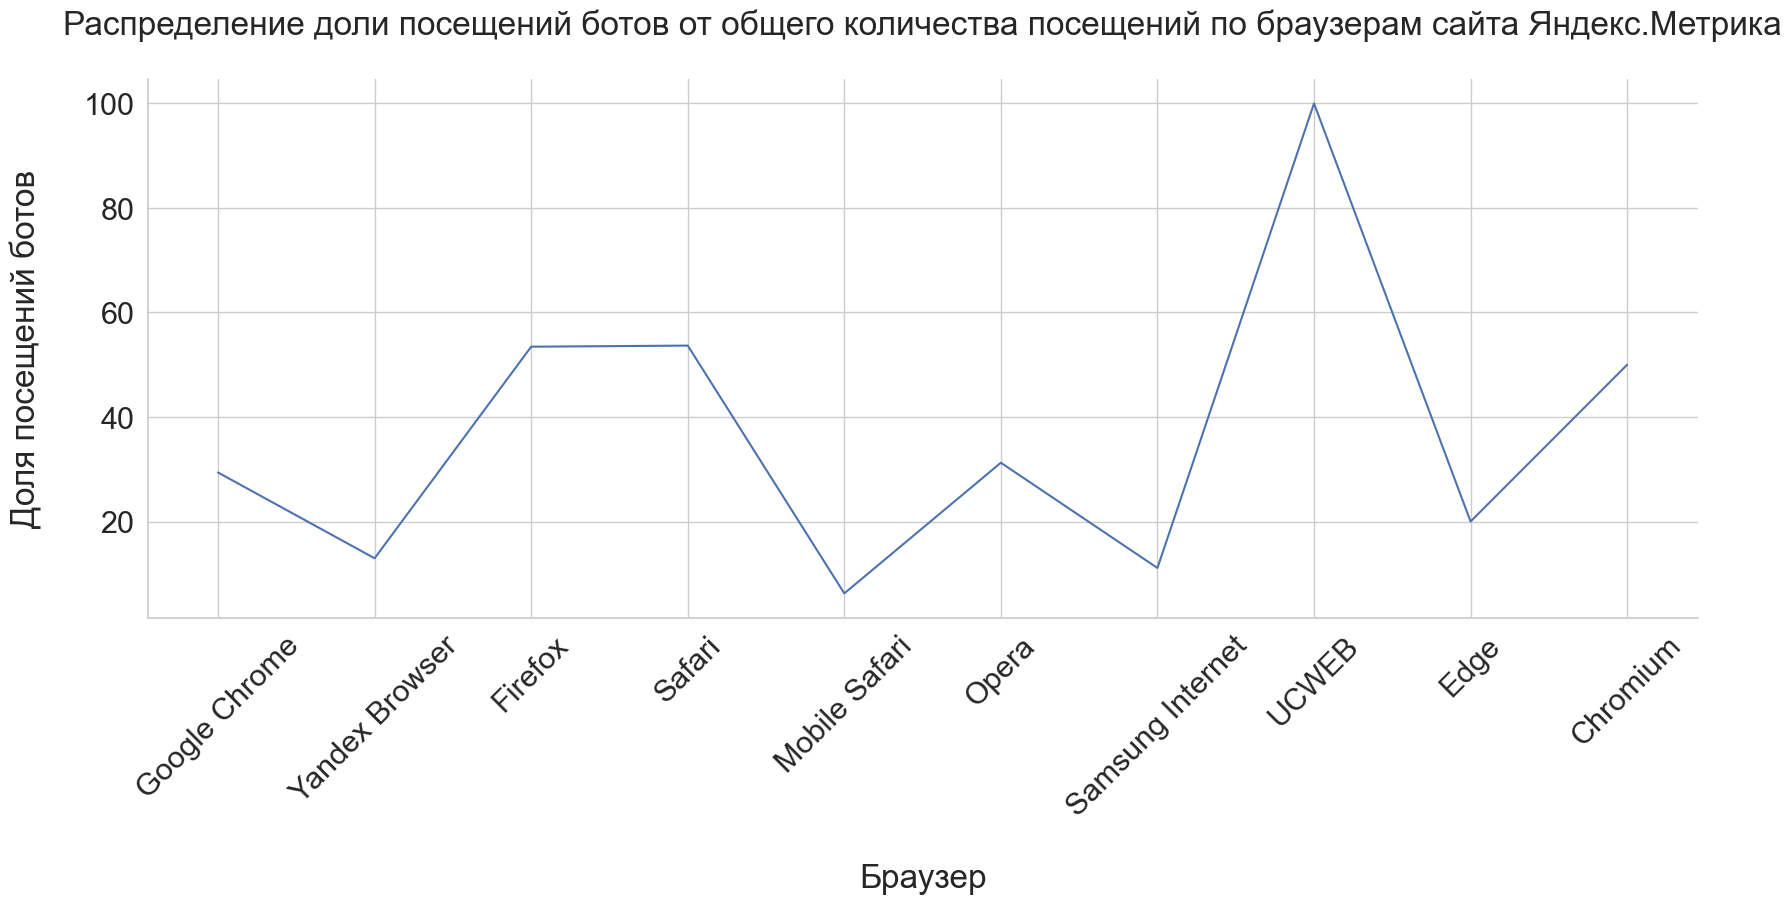

In [16]:
ax3 = sns.lineplot(data = visits_robots, x = 'browser',  y = 'percentage_of_visits')
ax3.set_title('Распределение доли посещений ботов от общего количества посещений по браузерам сайта Яндекс.Метрика\n')
ax3.set_ylabel('Доля посещений ботов\n')
ax3.set_xlabel('\nБраузер')
sns.despine()
plt.xticks(rotation=45)
plt.show()

**Ответ:** браузер с наибольшей долей посещений ботами сайта Яндекс.Метрика == UCWEB

### Задача №4.
Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями **Safari (не ботами)** с точностью до 1 знака после точки.

**Hint:** обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [17]:
Jandex_Metrics_data_4 = pd.read_csv('C:/Users/79196/Projects/data/step_4_lesson_7.csv')
Jandex_Metrics_data_4

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [18]:
sum_visits_users = Jandex_Metrics_data_4.groupby('browser', as_index=False) \
                                        .agg({'visits':'sum'}) \
                                        .rename(columns={'visits':'sum_visits'})
sum_visits_users

,browser,sum_visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0
5,Firefox,58.0
6,Google Chrome,354.0
7,Mobile Safari,16.0
8,Opera,16.0
9,Safari,41.0


In [19]:
merge_visits = Jandex_Metrics_data_4.merge(sum_visits_users, how='inner', on='browser')
merge_visits

,date,browser,user_type,visits,sum_visits
0,2020-06-15,Google Chrome,People,250.0,354.0
1,2020-06-15,Google Chrome,Robots,104.0,354.0
2,2020-06-15,Yandex Browser,People,47.0,54.0
3,2020-06-15,Yandex Browser,Robots,7.0,54.0
4,2020-06-15,Firefox,Robots,31.0,58.0
5,2020-06-15,Firefox,People,27.0,58.0
6,2020-06-15,Chrome Mobile,People,31.0,31.0
7,2020-06-15,Safari,Robots,22.0,41.0
8,2020-06-15,Safari,People,19.0,41.0
9,2020-06-15,Mobile Safari,People,15.0,16.0


In [20]:
merge_visits['fraction_visits'] = round((merge_visits.visits / merge_visits.visits.sum()) * 100, 1)
merge_visits

,date,browser,user_type,visits,sum_visits,fraction_visits
0,2020-06-15,Google Chrome,People,250.0,354.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,354.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,54.0,7.9
3,2020-06-15,Yandex Browser,Robots,7.0,54.0,1.2
4,2020-06-15,Firefox,Robots,31.0,58.0,5.2
5,2020-06-15,Firefox,People,27.0,58.0,4.5
6,2020-06-15,Chrome Mobile,People,31.0,31.0,5.2
7,2020-06-15,Safari,Robots,22.0,41.0,3.7
8,2020-06-15,Safari,People,19.0,41.0,3.2
9,2020-06-15,Mobile Safari,People,15.0,16.0,2.5


In [21]:
merge_visits.query('browser == "Safari" & user_type == "People"').fraction_visits 

8    3.2
Name: fraction_visits, dtype: float64

**Ответ:** процент открытий сайта настоящими пользователями Safari (не ботами) = 3.2 %

### Задача №5.
Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение **visits к users**) в разрезе по браузеру и значениям **Robots/People**.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера **Google Chrome** (округлите до целого)

In [22]:
from io import BytesIO
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))
df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [23]:
users_and_visits = df.merge(merge_visits)
users_and_visits['CR'] = users_and_visits.users / users_and_visits.visits
users_and_visits

,date,browser,user_type,users,visits,sum_visits,fraction_visits,CR
0,2020-06-15,Google Chrome,People,240.0,250.0,354.0,42.1,0.960000
1,2020-06-15,Google Chrome,Robots,104.0,104.0,354.0,17.5,1.000000
2,2020-06-15,Yandex Browser,People,44.0,47.0,54.0,7.9,0.936170
3,2020-06-15,Chrome Mobile,People,30.0,31.0,31.0,5.2,0.967742
4,2020-06-15,Firefox,Robots,29.0,31.0,58.0,5.2,0.935484
5,2020-06-15,Firefox,People,26.0,27.0,58.0,4.5,0.962963
6,2020-06-15,Safari,Robots,20.0,22.0,41.0,3.7,0.909091
7,2020-06-15,Safari,People,17.0,19.0,41.0,3.2,0.894737
8,2020-06-15,Mobile Safari,People,14.0,15.0,16.0,2.5,0.933333
9,2020-06-15,Opera,People,10.0,11.0,16.0,1.9,0.909091


In [24]:
users_and_visits.query('browser == "Google Chrome" & user_type == "Robots"').CR 

1    1.0
Name: CR, dtype: float64

**Ответ:** CR = 1